# **Real-Time Data processing**

© by A.Richter (under construction)

<img src=88x31.png  width="10%" style="float: left;"> 

http://www.openmeteo.com/doc/api



http://api.openmeteo.com/observations/openmeteo/1003/t2/last60m


http://api.openmeteo.com/observations/openmeteo/1003/t2/20190813


Vesseltracking by AIS
https://www.aishub.net/api




## Overview of the notebook: 

   1. [Getting Data from Online Sensors](#sensors)
   2. [Getting Data from WebServices](#webserv)


## Getting Data from Online Sensors <a name="sensors" ></a>

Sensor Output data can be delivered and requested over the internet via simple URL requests. For example the website http://www.openmeteo.com provides an Application Programming Interface (API) to share the meassured data of windspeed and temperature sensors around the **Leipziger Neuseenland** with the public.

The provided format is an xml based standard called [JSON](https://www.json.org/) (JavaScript Object Notation)

In [14]:
import urllib.request, json 
with urllib.request.urlopen("http://api.openmeteo.com/observations/openmeteo/1001/t2/last7d") as url:
    data = json.loads(url.read().decode())
    print("Number of Meassurements:", len(data))

Number of Meassurements: 19328


In [115]:
print(len(data))

19651


#### Time Stamps

In [37]:
import time
print(time.asctime( time.localtime(time.time()) ))

Thu Aug 15 06:57:33 2019


In [116]:
import numpy as np
import time

import pandas as pd

data2=np.zeros((len(data),2))
print(type(data2) )

#print(data2)

data2[:]=data
print(data2.shape )
print(time.asctime( time.localtime(data2[0,0]) ))
print(time.asctime( time.localtime(data2[39,0]) ))
print(time.asctime( time.localtime(data2[40,0]) ), data2[40,1] )



df=pd.DataFrame(data2[:,0],columns=['TimeStamp'])
df['temp'] = pd.DataFrame(data2[:,1])
df['TimeStamp']=pd.to_datetime(df['TimeStamp'],unit='s')
#print(df)

print(df.dtypes)

<class 'numpy.ndarray'>
(19651, 2)
Thu Aug  8 09:16:03 2019
Thu Aug  8 09:36:19 2019
Thu Aug  8 09:36:50 2019 22.8
TimeStamp    datetime64[ns]
temp                float64
dtype: object


In [65]:
import matplotlib.pyplot as plt

(array([737279., 737280., 737281., 737282., 737283., 737284., 737285.,
        737286.]), <a list of 8 Text xticklabel objects>)

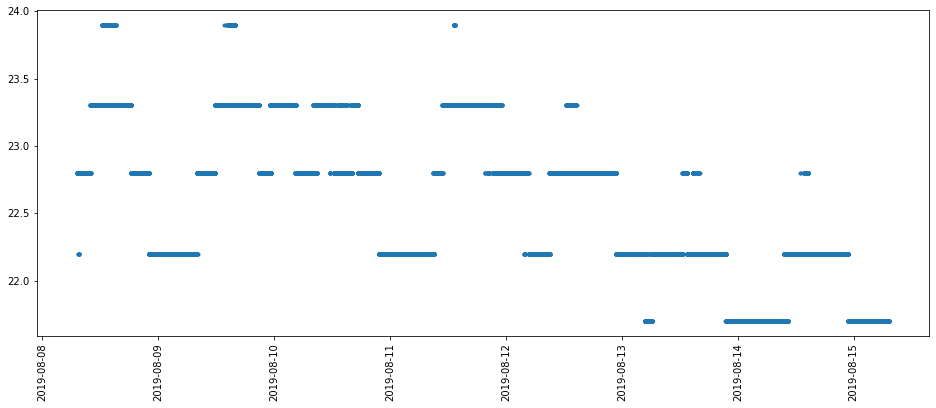

In [120]:
plt.figure(figsize=(16, 6))
plt.plot(df['TimeStamp'],df['temp'],'.')
plt.xticks(rotation='vertical')


In [56]:
import ipywidgets as widgets

In [63]:
widgets.IntSlider(
    min=0,
    max=len(data),
    step=1,
    description='Slider:',
    value=3
)

IntSlider(value=3, description='Slider:', max=42)

## Wind geschwindigkeiten

In [148]:
import urllib.request, json 
with urllib.request.urlopen("http://api.openmeteo.com/observations/openmeteo/1001/wind0/last4w") as url:
    data = json.loads(url.read().decode())
    print(len(data))

499710


In [149]:
print(data[200][1])

300


In [150]:
import numpy as np
import time

import pandas as pd

dfWind=pd.DataFrame(data[:][0],columns=['TimeStamp'])
dfWind['Wind'] = pd.DataFrame(data[:][1])
dfWind['TimeStamp']=pd.to_datetime(df['TimeStamp'],unit='s')
#print(df)

print(dfWind.dtypes)

TimeStamp    datetime64[ns]
Wind                float64
dtype: object


            TimeStamp          Wind
0 2019-08-08 07:16:03  1.563436e+09
1 2019-08-08 07:16:33  2.640000e+02
2 2019-08-08 07:17:03  4.000000e-01
3 2019-08-08 07:17:33  0.000000e+00


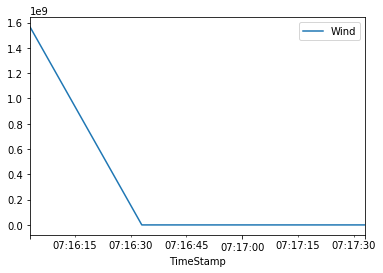

In [151]:
print(dfWind.head())
dfWind.plot(x="TimeStamp",y="Wind")


(array([737279.30277778, 737279.30289352, 737279.30300926, 737279.303125  ,
        737279.30324074, 737279.30335648, 737279.30347222, 737279.30358796,
        737279.3037037 , 737279.30381944]),
 <a list of 10 Text xticklabel objects>)

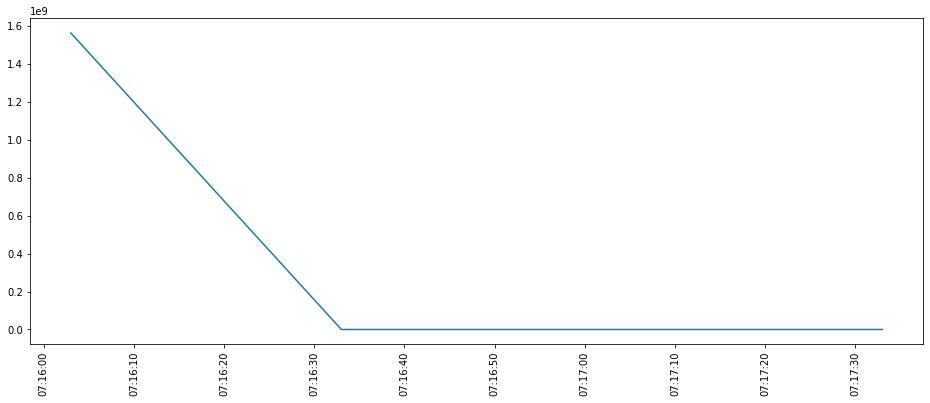

In [152]:
plt.figure(figsize=(16, 6))
plt.plot(dfWind['TimeStamp'],dfWind['Wind'])
plt.xticks(rotation='vertical')

In [39]:
df.iloc[6].latitude


IndexError: single positional indexer is out-of-bounds

Get the Coordinates all 4 stations and display them on a map

request each URL and gather infos (stationID, Lat, Lon, ) in a pandas dataframe 

In [41]:
import numpy as np
import pandas as pd
import urllib.request, json 
from ipyleaflet import *
from ipyleaflet import Map, Marker

MeteoStations=np.zeros((6,3))    

i=0
for station in (1000+np.arange(6)):
    with urllib.request.urlopen("http://api.openmeteo.com/observations/openmeteo/"+str(station)) as url:
        data = json.loads(url.read().decode())    
    
    print(data["sid"],data["latitude"],data["longitude"] )
    MeteoStations[i,:]=[data["sid"],data["latitude"],data["longitude"]]
    i+=1

print(MeteoStations)

df=pd.DataFrame(MeteoStations[:,0],columns=['sid'])
df['latitude'] = pd.DataFrame(MeteoStations[:,1])
df['longitude'] = pd.DataFrame(MeteoStations[:,2])

print(df[['longitude', 'sid']])

m=Map(center=(51.2, 12.3), zoom=9, basemap=basemaps.Esri.DeLorme)


#marker = Marker(location=[MeteoStations[1,1],MeteoStations[1,2]], draggable=False)
m.add_layer(Marker(location=[df.iloc[0].latitude,df.iloc[0].longitude ], draggable=False));
m.add_layer(Marker(location=[df.iloc[1].latitude,df.iloc[1].longitude ], draggable=False));
m.add_layer(Marker(location=[df.iloc[2].latitude,df.iloc[2].longitude ], draggable=False));
m.add_layer(Marker(location=[df.iloc[3].latitude,df.iloc[3].longitude ], draggable=False));
m.add_layer(Marker(location=[df.iloc[4].latitude,df.iloc[4].longitude ], draggable=False));
m.add_layer(Marker(location=[df.iloc[5].latitude,df.iloc[5].longitude ], draggable=False));
m

1000 51.3642545525 12.4045493889
1001 51.2643426847 12.343977716
1002 51.4380128519 12.3431160021
1003 51.2556752805 12.4239182434
1004 51.1720516966 12.4615430832
1005 51.229032872042 12.4399566650391
[[1000.           51.36425455   12.40454939]
 [1001.           51.26434268   12.34397772]
 [1002.           51.43801285   12.343116  ]
 [1003.           51.25567528   12.42391824]
 [1004.           51.1720517    12.46154308]
 [1005.           51.22903287   12.43995667]]
   longitude     sid
0  12.404549  1000.0
1  12.343978  1001.0
2  12.343116  1002.0
3  12.423918  1003.0
4  12.461543  1004.0
5  12.439957  1005.0


Map(basemap={'url': 'http://server.arcgisonline.com/ArcGIS/rest/services/Specialty/DeLorme_World_Base_Map/MapS…

## Getting Data from WebServices <a name="webserv" ></a>

In [9]:
from owslib.wms import WebMapService
#wms = WebMapService('http://geoserv.weichand.de:8080/geoserver/wms')


wms = WebMapService('https://neowms.sci.gsfc.nasa.gov/wms/wms')
print("Title: ", wms.identification.title)
print("Type: ", wms.identification.type)
print("Operations: ", [op.name for op in wms.operations])
print("GetMap options: ", wms.getOperationByName('GetMap').formatOptions)
print(20*"=")
for key in wms.contents.keys():
    print(key)

Title:  NASA Earth Observations (NEO) WMS
Type:  OGC:WMS
Operations:  ['GetCapabilities', 'GetMap']
GetMap options:  ['image/png', 'image/jpeg']
MOD14A1_M_FIRE
MOD14A1_E_FIRE
MOD14A1_D_FIRE
MODAL2_M_AER_OD
MYDAL2_M_AER_OD
MODAL2_E_AER_OD
MYDAL2_E_AER_OD
MODAL2_D_AER_OD
MYDAL2_D_AER_OD
MODAL2_M_AER_RA
MYDAL2_M_AER_RA
MODAL2_E_AER_RA
MYDAL2_E_AER_RA
MODAL2_D_AER_RA
MYDAL2_D_AER_RA
MCD43C3_M_BSA
MCD43C3_E_BSA
MOD_LSTD_CLIM_M
MOD_LSTD_CLIM_E
MOD_LSTN_CLIM_M
MOD_LSTN_CLIM_E
AVHRR_CLIM_M
AVHRR_CLIM_W
GEBCO_BATHY
BlueMarbleNG
BlueMarbleNG-TB
MOP_CO_M
MY1DMM_CHLORA
MY1DMW_CHLORA
MODAL2_M_CLD_FR
MYDAL2_M_CLD_FR
MODAL2_E_CLD_FR
MYDAL2_E_CLD_FR
MODAL2_D_CLD_FR
MYDAL2_D_CLD_FR
MODAL2_M_CLD_OT
MYDAL2_M_CLD_OT
MODAL2_E_CLD_OT
MYDAL2_E_CLD_OT
MODAL2_D_CLD_OT
MYDAL2_D_CLD_OT
MODAL2_M_CLD_RD
MYDAL2_M_CLD_RD
MODAL2_E_CLD_RD
MYDAL2_E_CLD_RD
MODAL2_D_CLD_RD
MYDAL2_D_CLD_RD
MODAL2_M_CLD_WP
MYDAL2_M_CLD_WP
MODAL2_E_CLD_WP
MYDAL2_E_CLD_WP
MODAL2_D_CLD_WP
MYDAL2_D_CLD_WP
MOD_721D_RR
MYD_721D_RR
GISS_TA_M
GISS

### Grabbing on layer as example to display it

In [2]:
name = 'MOD14A1_M_FIRE'
response = wms.getmap(layers=[name,],
                 styles=['rgb'],
                 bbox=(-180, -90, 180, 90), # Left, bottom, right, top
                 format='image/png',
                 size=(600,600),
                 srs='EPSG:4326',
                 transparent=True)
response


The response of the GetMap request is delivered in a binary object (as shown above) and needs to be converted in an image format to be displayed by matplotlib. Here is a easy example how to get the actual image data and how to display it within a map projection.

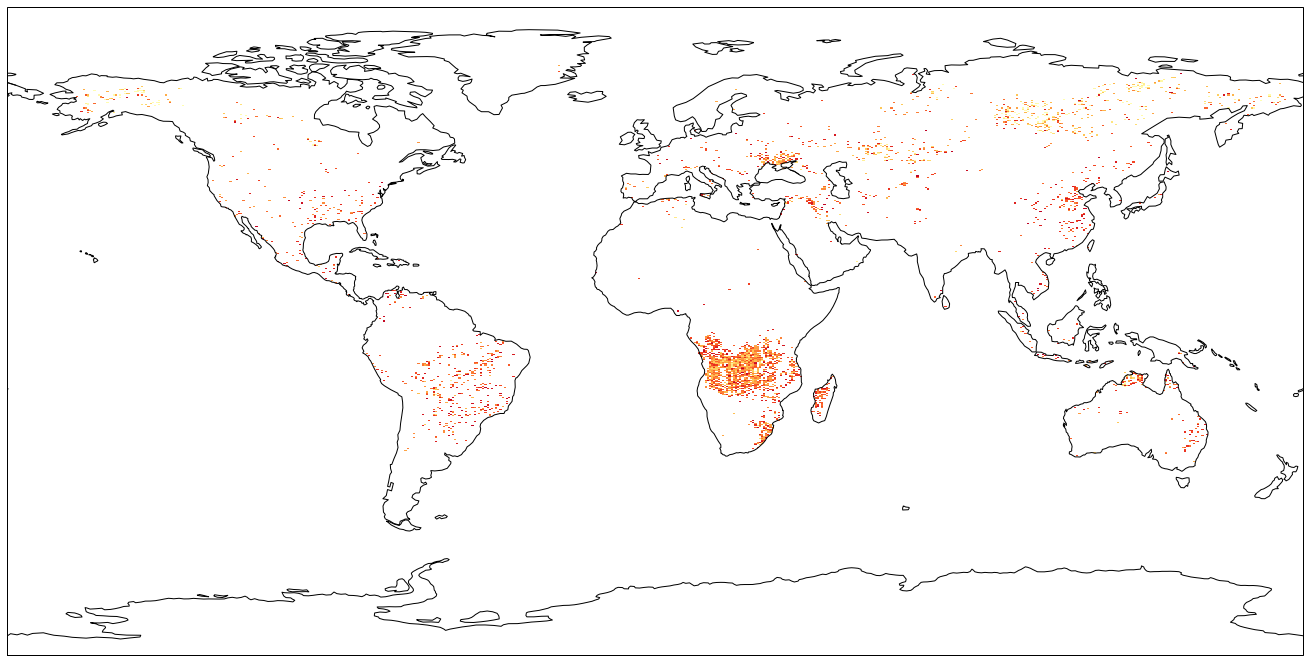

In [10]:
import io
image = io.BytesIO(response.read())

import cartopy
import matplotlib.pyplot as plt
%matplotlib inline
data = plt.imread(image)

fig = plt.figure(figsize=(18,16))
ax = fig.add_axes([0,0,1,1], projection=cartopy.crs.PlateCarree())
ax.imshow(data, origin="upper", extent=(-180, 180, -90, 90),
          transform=cartopy.crs.PlateCarree())
ax.coastlines()
plt.show()

References: 

   - https://ouranosinc.github.io/pavics-sdi/tutorials/owslib_intro.html

### Having a closer look at a WebMapping Service (WMS) 

In [5]:
from owslib.wms import WebMapService
#wms = WebMapService('http://geoserv.weichand.de:8080/geoserver/wms')


wms = WebMapService('https://neowms.sci.gsfc.nasa.gov/wms/wms')


In [6]:
wms.version

'1.1.1'

In [8]:
wms.items

<bound method WebMapService_1_1_1.items of <owslib.map.wms111.WebMapService_1_1_1 object at 0x10dbe1cf8>>